<a href="https://colab.research.google.com/github/jt3gu3/test-repo/blob/main/NLTK_Lezione_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lezione 2 - 07/02/2025 NLTK https://www.nltk.org/index.html

In [ ]:
%pip install pandas nltk matplotlib

In [ ]:
# per una visualizzazione dei dati in forma tabellare
from google.colab import data_table
data_table.enable_dataframe_formatter()

## Pandas - Leggere file csv

In [ ]:
import pandas as pd
#from google.colab import files #specifico per ambiente Google colab

In [ ]:
#uploaded = files.upload()
#file_path = list(uploaded.keys())[0] # Ottieni il nome del file caricato

In [ ]:
#utilizziamo il metodo read_csv per leggere il file csv
source_file = '/content/chatbot_csv.csv'
try:
    # il valore di ritorno è un DataFrame

    data = pd.read_csv(
          source_file,
          sep=';', # default è ','
          encoding='ISO-8859-1', # default è 'utf-8'. ISO-8859-1 è il formato di codifica dei caratteri per lingue europee e anche caratteri speciali e accenti
          on_bad_lines='skip' # in caso di errori di parsing, ad es. virgolette non chiuse, salta quella riga
          )
   # se pandas non riesce a interpretare correttamente il contenuto del CSV
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    #cattura gli errori di codifica dei caratteri (prova a modificare l'encoding ad esempio utf-8)
except UnicodeDecodeError as e:
    print(f"Encoding error: {e}")
    #file non trovato
except FileNotFoundError:
        print("File not found at specified path")
        #cattura qualsiasi altro tipo di errore che non rientra nei casi precedenti.
except Exception as e:
        print(f"Other error: {type(e).__name__}: {str(e)}") #stampo il tipo di errore e il messaggio di errore

In [ ]:
#type(data)
#data.__doc__
#data # per visualizzare il file csv con il formatter di google

In [ ]:
#visualizziamo le prime n righe del dataset
print(data[:5])


In [ ]:
# Verifica i tipi di dati, le colonne e le righe
#data.dtypes
#data.columns # torna i nomi delle colonne
#len(data) # torna il numero di righe

In [ ]:
#info sul dataframe, sulla struttura dati
#data.info()

In [ ]:
#data.isnull() #verifica se ci sono valori nulli e li visualizza

In [ ]:
#calcola il numero di valori nulli per ciascuna colonna
#data.isnull().sum()

In [ ]:
# Elimina le righe con valori nulli - pulizia dei dati
data.dropna(inplace=True) #modifico il dataframe originale

In [ ]:
# Visualizziamo i dati statistici: conteggio, media, deviazione standard, minimo, massimo e percentili
#data.describe()

In [ ]:
# Distribuzione per mese
#data['Data'].value_counts()

In [ ]:
#data['Data'].value_counts().plot(kind='pie')

In [ ]:
# Frequenza dei diversi intent
#data['Intent'].value_counts()

In [ ]:
#data['Intent'].value_counts().plot(kind='pie')

In [ ]:
# Frequenza delle domande
#data['Domanda utente'].value_counts()

## Pandas - Calcolo della lunghezza delle frasi in caratteri

In [ ]:
"""
Utilizzare Pandas quando:
- Vuoi una soluzione rapida e semplice
- La precisione linguistica non è cruciale
- Stai solo contando caratteri

Serve per individuare come gli utenti parlano: per keyword, frasi lunghe, brevi ecc.
"""


In [ ]:
# Distribuzione della lunghezza delle domande
data['Domanda utente'].str.len().hist()  #calcola la lunghezza di ciascuna domanda e visualizza un istogramma

In [ ]:
#filtered=data[data['Domanda utente'].str.len() >= 175]
#filtered

In [ ]:
# E' come se facessimo:

lunghezze_domande = []
for domanda in data['Domanda utente']:
    lunghezze_domande.append(len(domanda))


In [ ]:
#utilizza matplotlib per visualizzare l'istogramma
import matplotlib.pyplot as plt
# poi crea un istogramma di lunghezze_domande
len(lunghezze_domande)
plt.hist(lunghezze_domande, bins=20, color='skyblue', edgecolor='black') # oppure data['Domanda utente']
plt.title('Distribuzione lunghezza domande')
plt.xlabel('Lunghezza domande in caratteri')
plt.ylabel('Frequenza')
plt.show()

## Tipo di atto linguistico: domande dirette, indirette, affermazioni.

In [ ]:
"""
Atti diretti:

"Voglio cancellare l'ordine"
"Dimmi come tracciare il pacco"

Atti indiretti:

"Non sono più sicuro di aver bisogno di questo prodotto"
"Mi piacerebbe sapere come tracciare il pacco"


Domande esplicite:

"Dov'è il mio ordine?"
"Quando arriva la spedizione?"

"""

'\nAtti diretti:\n\n"Voglio cancellare l\'ordine"\n"Dimmi come tracciare il pacco"\n\nAtti indiretti:\n\n"Non sono più sicuro di aver bisogno di questo prodotto"\n"Mi piacerebbe sapere come tracciare il pacco"\n\n\nDomande esplicite:\n\n"Dov\'è il mio ordine?"\n"Quando arriva la spedizione?"\n\n'

In [ ]:
import re
from collections import Counter

def identifica_atto_linguistico(testo):
    testo = testo.lower()

    # Pattern per diversi atti linguistici
    patterns = {
        'domanda_diretta': [
            r'\?$',
            r'^(come|dove|quando|perché|chi|cosa|quale)',
        ],
        'richiesta_diretta': [
            r'^voglio',
            r'^devo',
            r'^ho bisogno',
            r'^dimmi',
        ],
        'richiesta_indiretta': [
            r'^(sarebbe possibile|si potrebbe)',
            r'^vorrei',
            r'^mi piacerebbe',
            r'potete',
        ]
    }
    #tipo è la chiave del dizionario patterns_list è il valore
    #for tipo, pattern_list in patterns.items():
    for key, value in patterns.items():
        if any(re.search(p, testo) for p in value):
            return key

    return 'altro'



In [ ]:
#codice client
# Esempi
esempi = [
    "Dove trovo i miei punti?",              # domanda_diretta
    "Voglio cancellare l'ordine",            # richiesta_diretta
    "Sarebbe possibile avere un reso?",      # richiesta_indiretta
    "Mi piacerebbe sapere il tracking",      # richiesta_indiretta
    "Ho bisogno di cambiare indirizzo"       # richiesta_diretta
]

for e in esempi:
    print(f"\nTesto: {e}")
    print(f"Atto linguistico: {identifica_atto_linguistico(e)}")


Testo: Dove trovo i miei punti?
Atto linguistico: domanda_diretta

Testo: Voglio cancellare l'ordine
Atto linguistico: richiesta_diretta

Testo: Sarebbe possibile avere un reso?
Atto linguistico: domanda_diretta

Testo: Mi piacerebbe sapere il tracking
Atto linguistico: richiesta_indiretta

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: richiesta_diretta


In [ ]:
#ciclo sulle mie domande
for d in data['Domanda utente'][:10]:
    print(f"\nTesto: {e}")
    print(f"Atto linguistico: {identifica_atto_linguistico(d)}")



Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: domanda_diretta

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: altro

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: altro

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: domanda_diretta

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: domanda_diretta

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: altro

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: domanda_diretta

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: altro

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: altro

Testo: Ho bisogno di cambiare indirizzo
Atto linguistico: domanda_diretta


In [ ]:
def analizza_distribuzione_atti_linguistici(testi):
    # Raccoglie tutti gli atti linguistici
    atti = [identifica_atto_linguistico(testo) for testo in testi]

    # Conta le occorrenze
    conteggio = Counter(atti)

    # Calcola le percentuali
    totale = len(atti)
    percentuali = {
        atto: {
            'count': count,
            'percentuale': f"{(count/totale)*100:.1f}%"
        }
        for atto, count in conteggio.items()
        #for item in conteggio.items():
        #atto = item[0]   # primo elemento della coppia (chiave)
        #count = item[1]  # secondo elemento della coppia (valore)
    }

    return percentuali

In [ ]:
risultati = analizza_distribuzione_atti_linguistici(data['Domanda utente']) #esempi

print("\nDistribuzione degli atti linguistici:")
for atto, stats in risultati.items():
    print(f"\n{atto}:")
    print(f"Conteggio: {stats['count']}")
    print(f"Percentuale: {stats['percentuale']}")


Distribuzione degli atti linguistici:

domanda_diretta:
Conteggio: 42
Percentuale: 40.8%

altro:
Conteggio: 50
Percentuale: 48.5%

richiesta_diretta:
Conteggio: 5
Percentuale: 4.9%

richiesta_indiretta:
Conteggio: 6
Percentuale: 5.8%


## NLTK

In [ ]:
# Distribuzione delle parole
"""
Da utilizzare quando:
- Hai bisogno di un'analisi linguistica accurata
- Devi gestire testi complessi
- Ti servono analisi linguistiche più avanzate
"""

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import defaultdict
import string


In [ ]:
#È un modello pre-addestrato per la tokenizzazione del testo. Serve per dividere correttamente il testo in frasi e parole: essenziale per funzioni come sent_tokenize() e word_tokenize(). Sa gestire abbreviazioni, punteggiatura e altri casi particolari
nltk.download('punkt')
nltk.download('punkt-tab')
#Scarica un elenco di "stopwords" (parole funzionali come "il", "la", "e", "che", ecc.). Le stopwords sono parole molto comuni che spesso vengono rimosse nell'analisi del testo
nltk.download('stopwords')
#Scarica un modello per il Part-of-Speech tagging (POS tagging). Serve per identificare la funzione grammaticale delle parole (nome, verbo, aggettivo, ecc.)
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger-eng')


In [ ]:
#leggo il file usando Gestore di Contesto. Gestisce automaticamente le risorse del sistema e si occupa di chiudere il file anche se il codice genera errore
source_file='/content/chatbot_csv.csv'
try:
    with open(source_file, 'r', encoding='ISO-8859-1') as f:
        lines = f.read().splitlines()
except FileNotFoundError:
    print(f"Il file {source_file} non esiste")
except PermissionError:
    print(f"Non hai i permessi per accedere al file {source_file}")
except Exception as e:
    print(f"Si è verificato un errore: {str(e)}")


In [ ]:
#salvo le domande in una lista
domande=[]
for line in lines:
    domande.append(line.split(';')[1])

In [ ]:
print(f"Numero di righe (comprese righe null o stringhe vuote) {len(domande)}")
#print(type(domande))
#print(domande[:10])

Numero di righe (comprese righe null o stringhe vuote) 113


In [ ]:
#elimino le righe vuote con list comprehension, caratteristica di Python per creare nuove liste basate su sequenze o iterabili esistenti.
# espressione per elemento in iterabile + condizione
domande_finali=[]
domande_finali = [line for line in domande if line and line != 'Domanda utente']

print(f"Numero di righe  dopo aver filtrato le righe con testo diverso da stringa vuota) {len(domande_finali)}")

In [ ]:
domande_finali[0]

## NLTK pipeline

In [ ]:
# tokenizzazione
# stop words removal
# POS tagging
# lemmatizzazione

In [ ]:
#tokenizzazione- word
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

testo = "Vorrei sapere...Come tracciare il mio ordine?"
lista_token = word_tokenize(testo)
print(lista_token)

In [ ]:
def tokenizza_frase(testo):
    return word_tokenize(testo)

In [ ]:
for d in domande_finali[:10]:
    print(f"\nTesto: {d}")
    print(f"Tokenizzazione: {tokenizza_frase(d)}")

In [ ]:
##tokenizzazione- frase
frase="Buongiorno. Sono qui per un appuntamento con la dottoressa Rossi. Sono già una sua paziente."
frase_token = sent_tokenize(frase)
print(frase_token)

## Preprocessing del testo- Cosa sono le stopword

In [ ]:
# parole più comuni in una lingua che normalmente non aggiungono significato all'analisi del testo. Pensiamo a parole come "il", "la", "e", "che", "di", "in", ecc.
# Come fare per rimuovere le stopwords?
stop_words = set(stopwords.words('italian'))
stop_words #Le stopwords sono fornite in minuscolo, quindi è buona pratica convertire il testo in minuscolo prima di fare analisi del testo

In [ ]:
#rimuovo le stopwords
stopwords_ita    = stopwords.words('italian') #importo le stopwords in italiano
filtered = [w for w in lista_token if w.lower() not in stopwords_ita]
print(filtered)

['Vorrei', 'sapere', '...', 'tracciare', 'ordine', '?']


In [ ]:
#POS tagging
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

tagged = pos_tag(filtered)
print(tagged)

[('inserire', 'NN'), ('buono', 'NN'), ('sconto', 'VBD'), ('5\x80', 'CD'), ('volevo', 'NNS'), ('acquistare', 'JJ'), ('prada', 'JJ'), ('edt', 'NN'), ('figlio', 'NN'), ('pagarlo', 'NN'), ('tre', 'NN'), ('rate', 'NN'), ('salve', 'NN'), ('effettuato', 'NN'), ('ordine', 'NN'), ('verrà', 'NN'), ('spedito', 'NN'), ('signora', 'NN'), ('maria', 'NN'), ('rossi', 'NN'), ('vorrei', 'NN'), ('pagamento', 'IN'), ('venisse', 'NN'), ('effettuato', 'NN'), ('medesima', 'NN'), ('punti', 'NN'), ('scadenza', 'NN'), ('?', '.'), ('?', '.'), ('?', '.'), ('?', '.'), ("un'app", 'NN'), ('?', '.'), ('effettuo', 'CC'), ('pagamento', 'IN'), ('cosa', 'JJ'), ('succede', 'NN'), ('svuota', 'NN'), ('carrello', 'NN'), ('?', '.'), ('salve', 'VB'), ('momento', 'NN'), ('sceglie', 'NN'), ('pagamento', 'IN'), ('rateale', 'NN'), ('?', '.'), ('ordine', 'JJ'), ('risulta', 'NN'), ('annullato', 'NN'), ('stata', 'NN'), ('inviata', 'NN'), ('nessuna', 'NN'), ('notifica', 'NN'), ('cambiare', 'NN'), ('metodo', 'NN'), ('pagamento', 'NN'),

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## NLTK- Estrazione di topic

In [ ]:
# Versione semplice
def estrai_topic_simple(testi, num_parole=5):
    """
    Estrae i topic principali da una lista di testi analizzando
    le parole più frequenti, escludendo le stopwords
    """
    # Preparazione stopwords e punteggiatura
    stop_words = set(stopwords.words('italian'))
    stop_words.update(string.punctuation)

    # Tokenizzazione e pulizia
    parole_totali = []
    for testo in testi:
        # Converte in minuscolo e tokenizza
        tokens = word_tokenize(testo.lower())

        # Rimuove stopwords e punteggiatura
        tokens_puliti = [
            parola for parola in tokens
            if parola not in stop_words and len(parola) > 2
        ]

        parole_totali.extend(tokens_puliti)

    # Calcola la frequenza delle parole
    freq_dist = FreqDist(parole_totali)

    # Trova le parole più comuni
    parole_comuni = freq_dist.most_common(num_parole)



    return {
        'parole_frequenti': parole_comuni

    }


In [ ]:
# estrazione delle parole più comuni
# Per farlo, unisci tutte le domande in un unico testo
testo_completo = ' '.join(domande_finali)
tokens=word_tokenize(testo_completo)
#print(tokens[:10]) #visualizzo le prime 10 parole
fd = FreqDist(testo_completo.split())
print(fd.most_common(30)) #visualizzo stopwords come il di in ecc.


[('di', 30), ('un', 29), ('il', 29), ('ho', 22), ('non', 21), ('pagamento', 16), ('punti', 15), ('come', 14), ('ma', 13), ('per', 12), ('che', 12), ('con', 12), ('i', 12), ('sono', 12), ('ordine', 11), ('la', 11), ('è', 11), ('fatto', 11), ('vorrei', 10), ('mi', 10), ('a', 10), ('in', 9), ('Salve', 9), ('da', 9), ('mio', 8), ('e', 8), ('posso', 8), ('sconto', 7), ('si', 7), ('devo', 7)]


<Axes: xlabel='Samples', ylabel='Counts'>

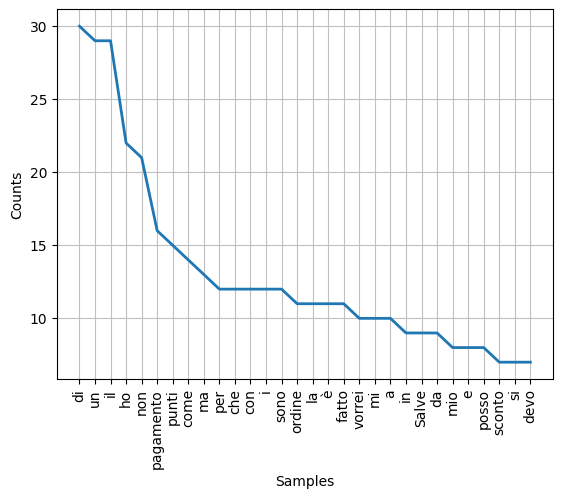

In [ ]:
fd.plot(30)

## NLTK- Analizza testi

In [ ]:
def analizza_testi(testi):
    """
    Analizza una lista di testi ed estrae informazioni utili
    """
    # Estrai i topic
    risultati = estrai_topic_simple(testi)
    #risultati = estrai_topic_simple(testi, 20)
    # Stampa i risultati in formato leggibile
    """
    print("\nParole più frequenti:")
    for parola, freq in risultati['parole_frequenti']:
        print(f"- '{parola}' (frequenza: {freq})")
        print("  Esempi di contesto:")
        for contesto in risultati['contesti'].get(parola, []):
            print(f"  * ...{contesto}...")
        print()
    """
    print(f"Ecco le parole frequenti:")

    return risultati

## Codice client

In [ ]:
#Identificare percorsi problematici (es: utenti che fanno molte domande sullo stesso tema)
print("Analisi dei testi di esempio:")
risultati=analizza_testi(domande_finali)
# print(risultati.get('contesti'))
print(risultati)

Analisi dei testi di esempio:
Ecco le parole frequenti:
{'parole_frequenti': [('pagamento', 18), ('punti', 17), ('ordine', 15), ('vorrei', 13), ('salve', 11)]}


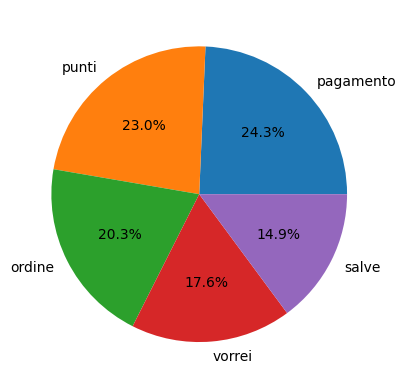

In [ ]:
chiavi = [item[0] for item in risultati['parole_frequenti']]
valori = [item[1] for item in risultati['parole_frequenti']]

#plt.bar(chiavi, valori, color="skyblue")
plt.pie(valori, labels=chiavi, autopct='%1.1f%%')
plt.show()

In [ ]:
# Automatic topic discovery script
# TF-IDF (Term Frequency-Inverse Document Frequency) è una misura statistica che valuta l'importanza di una parola in un documento rispetto a una collezione di documenti

In [ ]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

def scopri_argomenti(file_path, colonna_testo, n_clusters=5, parole_per_cluster=10):
    """
    Scopre automaticamente gli argomenti principali in un dataset testuale

    Parameters:
    file_path (str): Percorso del file CSV
    colonna_testo (str): Nome della colonna contenente i testi
    n_clusters (int): Numero di cluster/argomenti da trovare
    parole_per_cluster (int): Numero di parole caratteristiche per ogni cluster
    """
    # Leggi il file
    print(f"Leggendo il file {file_path}...")
    try:
    # il valore di ritorno è un DataFrame

        df = pd.read_csv(
              file_path,
              sep=';', # default è ','
              encoding='ISO-8859-1', # default è 'utf-8'. ISO-8859-1 è il formato di codifica dei caratteri per lingue europee e anche caratteri speciali e accenti
              on_bad_lines='skip' # in caso di errori di parsing, ad es. virgolette non chiuse, salta quella riga
              )
    except pd.errors.ParserError as e:
        print(f"Error reading CSV: {e}")
        #cattura gli errori di codifica dei caratteri (prova a modificare l'encoding ad esempio utf-8)
    except UnicodeDecodeError as e:
        print(f"Encoding error: {e}")
        #file non trovato
    except FileNotFoundError:
            print("File not found at specified path")
            #cattura qualsiasi altro tipo di errore che non rientra nei casi precedenti.
    except Exception as e:
            print(f"Other error: {type(e).__name__}: {str(e)}")

    testi = df[colonna_testo].dropna().tolist()

    stop_words_italian = stopwords.words('italian')
    # Converti i testi in una matrice TF-IDF
    print("Analizzando i testi...")
    vectorizer = TfidfVectorizer(
        max_features=1000,  # Limita il vocabolario alle 1000 parole più frequenti
        stop_words=stop_words_italian,
        min_df=2  # Ignora parole che appaiono in un solo documento
    )

    X = vectorizer.fit_transform(testi)

    # Applica il clustering
    print(f"Identificando {n_clusters} argomenti principali...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Trova le parole caratteristiche per ogni cluster
    feature_names = vectorizer.get_feature_names_out()

    # Analisi dei cluster
    print("\nARGOMENTI IDENTIFICATI:")
    print("=" * 50)

    for i in range(n_clusters):
        # Trova i documenti in questo cluster
        docs_in_cluster = [doc for doc, label in zip(testi, cluster_labels) if label == i]
        n_docs = len(docs_in_cluster)

        # Trova le parole più caratteristiche del cluster
        centroide = kmeans.cluster_centers_[i]
        top_indices = centroide.argsort()[::-1][:parole_per_cluster]
        top_words = [feature_names[idx] for idx in top_indices]

        # Calcola la lunghezza media dei documenti nel cluster
        avg_length = np.mean([len(doc.split()) for doc in docs_in_cluster])

        print(f"\nArgomento {i+1} ({n_docs} documenti):")
        print(f"Parole chiave: {', '.join(top_words)}")
        print(f"Lunghezza media documenti: {avg_length:.0f} parole")

        # Mostra un esempio di testo da questo cluster (il più corto per leggibilità)
        if docs_in_cluster:
            esempio = min(docs_in_cluster, key=len)
            if len(esempio) > 100:
                esempio = esempio[:100] + "..."
            print(f"Esempio di testo: \"{esempio}\"")

    # Statistiche generali
    print("\nSTATISTICHE GENERALI:")
    print("=" * 50)
    print(f"Totale documenti analizzati: {len(testi)}")
    print(f"Distribuzione documenti per argomento:")
    conteggio = Counter(cluster_labels)
    for cluster, count in sorted(conteggio.items()):
        percentuale = (count / len(testi)) * 100
        print(f"Argomento {cluster+1}: {count} documenti ({percentuale:.1f}%)")



In [ ]:
# codice client:

scopri_argomenti(source_file, "Domanda utente", n_clusters=5)

## NLTK-Sentiment Analysis

In [ ]:
%pip install textblob

In [ ]:
%pip install seaborn

In [ ]:
# Sentiment Analysis con textblob per testi in inglese

from textblob import TextBlob
import seaborn as sns

In [ ]:
# Definiamo le nostre funzioni di base
def analizza_sentimento(testo):
    analisi = TextBlob(testo)
    return analisi.sentiment.polarity

def classifica_sentimento(score):
    if score > 0.1:
        return 'Positivo'
    elif score < -0.1:
        return 'Negativo'
    else:
        return 'Neutro'


In [ ]:
#codice client
recensioni= [
    "The food was awful, I will never come back",
    "The pizza was average, nothing special",
    "Excellent service, very kind waiters",
    "Prices too high for what they offer"
]

# Creiamo un DataFrame con i risultati
risultati = {
    'Recensione': recensioni,
    'Score': [analizza_sentimento(rec) for rec in recensioni],
}

df = pd.DataFrame(risultati)
df['Sentiment'] = df['Score'].apply(classifica_sentimento)

# Visualizziamo i risultati
print("\nAnalisi multiple recensioni:")
print(df)

## Sentiment analysis in italiano

In [ ]:
%pip install feel-it

In [ ]:
domande_finali[:10]

In [ ]:
from feel_it import EmotionClassifier, SentimentClassifier

# Inizializziamo i classificatori
sentiment_classifier = SentimentClassifier()

# Le nostre recensioni in italiano

recensioni = [
    "Il cibo faceva schifo, non tornerò mai più",
    "La pizza era nella media, niente di speciale",
    "Ottimo servizio, camerieri molto gentili",
    "Prezzi troppo alti per quello che offrono"
]

# Analisi del sentimento
sentimenti = sentiment_classifier.predict(recensioni)

# Visualizziamo i risultati
for recensione, sentimento in zip(recensioni, sentimenti): #domande_finali
    print(f"\nRecensione: {recensione}")
    print(f"Sentiment: {sentimento}")

## Classificazione di intent

In [ ]:
def classifica_intento(testo):
    # Dizionario di parole chiave per ogni intento
    intenti = {
        'spedizione': ['spedizione', 'spedire', 'consegna', 'express', 'pacco', 'indirizzo'],
        'pagamento': ['pagamento', 'pagare', 'carta', 'paypal', 'bonifico', 'rate', 'postepay'],
        'punti_fedelta': ['punti', 'fidelity', 'card', 'raccolta'],
        'ordine': ['ordine', 'acquisto', 'carrello'],
        'sconto': ['sconto', 'codice', 'coupon', 'promo'],
        'prodotto': ['profumo', 'fragranza', 'prodotto', 'campione', 'campioncino']
    }

    # Converte il testo in minuscolo per il matching
    testo = testo.lower()

    # Conta le occorrenze di parole chiave per ogni intento
    matches = {}
    for intento, keywords in intenti.items():
        count = sum(1 for keyword in keywords if keyword in testo)
        matches[intento] = count

    # Ritorna l'intento con più matches
    if max(matches.values()) > 0:
        return max(matches.items(), key=lambda x: x[1])[0]
    return 'altro'  # default se nessun match trovato


In [ ]:
#codice client
# Test con alcune domande
domande_test = [
    "Come posso tracciare la mia spedizione?",
    "Vorrei pagare con PayPal, è possibile?",
    "Non vedo i miei punti sulla fidelity card",
    "Come si cancella un ordine?",
    "Dove inserisco il codice sconto?",
    "Avete dei campioncini di profumo?",
    "Qual è il vostro numero di telefono?" , # questo dovrebbe essere 'altro'
    "Quando siete aperti?"
]

# Testiamo la classificazione
for domanda in domande_test:
    intento = classifica_intento(domanda)
    print(f"\nDomanda: {domanda}")
    print(f"Intento rilevato: {intento}")

# Analizziamo un dataset reale
recensioni = pd.DataFrame({
    'testo': domande_test,
    'intento_classificato': [classifica_intento(d) for d in domande_test]
})

print("\n=== Distribuzione degli intenti ===")
print(recensioni['intento_classificato'].value_counts())


## Come conosco gli intent non classificati

In [ ]:
#visualizzo le righe che appartengono a intent classificato come altro
recensioni[recensioni['intento_classificato'] =="altro"]

## Identificare pattern di comunicazione ricorrenti

In [ ]:
"""
Ad esempio puoi conoscere
- Se dopo una domanda sul pagamento spesso seguono domande sulla spedizione
- Se problemi con i punti fedeltà portano a domande sugli sconti
- Quali sono le sequenze di domande più tipiche
"""

In [ ]:
def analizza_pattern_conversazioni(conversazioni, window_size=2):
    # Prima classifichiamo gli intenti di tutte le conversazioni
    sequenze_intenti = []

    for conv in conversazioni:
        intento = classifica_intento(conv)
        sequenze_intenti.append(intento)

    # Troviamo pattern di sequenze (es: domande che spesso vengono fatte in sequenza)
    patterns = []
    for i in range(len(sequenze_intenti) - window_size + 1):
        pattern = tuple(sequenze_intenti[i:i+window_size])
        patterns.append(pattern)

    # Contiamo i pattern più frequenti
    pattern_freq = Counter(patterns)

    return pattern_freq.most_common(5)



In [ ]:
#codice client
# Esempio di conversazioni in sequenza temporale
conversazioni_esempio = [
    "Come si paga con PayPal?",                    # pagamento
    "Non vedo l'ordine confermato",               # ordine
    "Quando arriva la spedizione?",               # spedizione
    "Ho dei punti sulla tessera?",                # punti_fedelta
    "Posso modificare l'indirizzo di consegna?",  # spedizione
    "Non funziona il codice sconto",              # sconto
    "Come traccio il pacco?",                     # spedizione
    "Dove inserisco il codice promo?",            # sconto
]

# Analizziamo i pattern
pattern_comuni = analizza_pattern_conversazioni(conversazioni_esempio)

print("Pattern più comuni nelle conversazioni:")
for pattern, freq in pattern_comuni:
    print(f"\nSequenza: {' -> '.join(pattern)}")
    print(f"Frequenza: {freq}")

Pattern più comuni nelle conversazioni:

Sequenza: spedizione -> sconto
Frequenza: 2

Sequenza: pagamento -> ordine
Frequenza: 1

Sequenza: ordine -> spedizione
Frequenza: 1

Sequenza: spedizione -> punti_fedelta
Frequenza: 1

Sequenza: punti_fedelta -> spedizione
Frequenza: 1


In [ ]:
from itertools import combinations

def analizza_pattern_senza_ordine(conversazioni, window_size=2):
    # Classifichiamo gli intenti
    intenti = [classifica_intento(conv) for conv in conversazioni]

    # Troviamo combinazioni di intenti (ignorando l'ordine)
    patterns = []
    for i in range(len(intenti) - window_size + 1):
        # Usando combinations invece di sequenze ordinate
        pattern = frozenset(intenti[i:i+window_size])
        patterns.append(pattern)

    # Contiamo le combinazioni più frequenti
    pattern_freq = Counter(patterns)

    return pattern_freq.most_common(5)



In [ ]:
# Esempio di uso
conversazioni_esempio = [
    "Come si paga con PayPal?",                    # pagamento
    "Non vedo l'ordine confermato",               # ordine
    "Quando arriva la spedizione?",               # spedizione
    "Non funziona il pagamento",                  # pagamento
    "Dov'è il mio ordine?"                        # ordine
]

# Analizziamo i pattern
pattern_comuni = analizza_pattern_senza_ordine(conversazioni_esempio)

print("Combinazioni di intenti più comuni:")
for pattern, freq in pattern_comuni:
    print(f"\nIntenti correlati: {' & '.join(pattern)}")
    print(f"Frequenza: {freq}")

Combinazioni di intenti più comuni:

Intenti correlati: pagamento & ordine
Frequenza: 2

Intenti correlati: ordine & spedizione
Frequenza: 1

Intenti correlati: pagamento & spedizione
Frequenza: 1


## Identificare urgenza

In [ ]:
def analizza_urgenza(testo):
    # Parole chiave che indicano diversi livelli di urgenza
    patterns = {
        'alta': [
            'bloccato', 'errore', 'non funziona', 'urgente',
            'problema', 'annullato', 'subito', 'immediatamente',
            'perdita', 'impossibile'
        ],
        'media': [
            'modificare', 'cambiare', 'sbagliato', 'non riesco',
            'aiuto', 'non capisco', 'non trovo'
        ],
        'bassa': [
            'vorrei', 'come', 'informazioni', 'possibile',
            'quando', 'dove', 'sapere'
        ]
    }

    testo = testo.lower()

    # Controlla le parole chiave per ogni livello
    for livello, keywords in patterns.items():
        if any(word in testo for word in keywords):
            return livello

    return 'bassa'  # default



In [ ]:
# Test per verifica urgenza
esempi = [
    "Il mio ordine è bloccato da 3 giorni",          # alta
    "Non riesco a completare il pagamento",          # media
    "Vorrei sapere quando arriva il pacco",          # bassa
    "C'è un errore nel sistema di pagamento",        # alta
    "Come posso vedere i miei punti?"                # bassa
]

for testo in esempi:
    urgenza = analizza_urgenza(testo)
    print(f"\nTesto: {testo}")
    print(f"Livello di urgenza: {urgenza}")

## Estrarre entità

In [ ]:
import re

def estrai_entita(testo):
    entita = {
        'numeri_ordine': [],
        'prodotti': [],
        'metodi_pagamento': [],
        'date': []
    }

    # Pattern per le diverse entità
    patterns = {
        'numeri_ordine': [
            r'ordine\s+#?\d+',
            r'#\d+',
            r'ID:?\s*\d+',
            r'[1-9]{5}/202[0-9]{1}'
        ],
        'metodi_pagamento': [
            r'paypal',
            r'carta di credito',
            r'bonifico',
            r'postepay',
            r'satispay'
        ],
        'date': [
            r'\d{1,2}[-/]\d{1,2}[-/]\d{2,4}',
            r'\d{1,2}\s+(gennaio|febbraio|marzo|aprile|maggio|giugno|luglio|agosto|settembre|ottobre|novembre|dicembre)\s+\d{4}'
        ],
        'prodotti': [
            r'profumo\s+\w+',
            r'fragranza\s+\w+',
            r'crema\s+\w+'
        ]
    }

    testo = testo.lower()

    # Estrae le entità usando i pattern
    for tipo, pattern_list in patterns.items():
        for pattern in pattern_list:
            matches = re.findall(pattern, testo)
            if matches:
                entita[tipo].extend(matches)

    return entita



In [ ]:
# Test
esempi = [
    "Ho un problema con l'ordine #12345",
    "Vorrei pagare con PayPal l'ordine del 15/01/2024",
    "Non riesco a comprare il profumo Chanel con la carta di credito",
    "L'ordine ID:789 non è ancora arrivato",
    "Ho eseguito un ordine 77384/2021ma mi sono accorta di non aver pagato qual é il vs. indirizzo Paypal per procedere all´acquisto?"
]

for testo in esempi:
    entita = estrai_entita(testo)
    print(f"\nTesto: {testo}")
    print("Entità trovate:")
    for tipo, valori in entita.items():
        if valori:  # mostra solo se sono state trovate entità
            print(f"{tipo}: {valori}")


Testo: Ho un problema con l'ordine #12345
Entità trovate:
numeri_ordine: ['ordine #12345', '#12345']

Testo: Vorrei pagare con PayPal l'ordine del 15/01/2024
Entità trovate:
metodi_pagamento: ['paypal']
date: ['15/01/2024']

Testo: Non riesco a comprare il profumo Chanel con la carta di credito
Entità trovate:
prodotti: ['profumo chanel']
metodi_pagamento: ['carta di credito']

Testo: L'ordine ID:789 non è ancora arrivato
Entità trovate:

Testo: Ho eseguito un ordine 77384/2021ma mi sono accorta di non aver pagato qual é il vs. indirizzo Paypal per procedere all´acquisto?
Entità trovate:
numeri_ordine: ['ordine 77384', '77384/2021']
metodi_pagamento: ['paypal']


In [ ]:
#analisi completa
def analisi_completa(testo):
    return {
        'testo': testo,
        'urgenza': analizza_urgenza(testo),
        'entita': estrai_entita(testo),
        'atto_linguistico': identifica_atto_linguistico(testo)
    }



In [ ]:
# Esempio
testo = "Ho urgentemente bisogno di modificare il pagamento PayPal dell'ordine #45678 del 15/01/2024"
risultato = analisi_completa(testo)
print("\nAnalisi completa:")
for chiave, valore in risultato.items():
    print(f"\n{chiave}:")
    print(valore)


Analisi completa:

testo:
Ho urgentemente bisogno di modificare il pagamento PayPal dell'ordine #45678 del 15/01/2024

urgenza:
alta

entita:
{'numeri_ordine': ['ordine #45678', '#45678'], 'prodotti': [], 'metodi_pagamento': ['paypal'], 'date': ['15/01/2024']}

atto_linguistico:
altro


In [ ]:
finale=[ analisi_completa(d) for d in data['Domanda utente'][:10]]

In [ ]:
#finale

[{'testo': 'come inserire mio buono sconto 5\x80',
  'urgenza': 'bassa',
  'entita': {'numeri_ordine': [],
   'prodotti': [],
   'metodi_pagamento': [],
   'date': []},
  'atto_linguistico': 'domanda_diretta'},
 {'testo': 'volevo acquistare un Prada edt per mio figlio e pagarlo in tre rate',
  'urgenza': 'bassa',
  'entita': {'numeri_ordine': [],
   'prodotti': [],
   'metodi_pagamento': [],
   'date': []},
  'atto_linguistico': 'altro'},
 {'testo': 'Salve ho effettuato un ordine che verrà spedito alla signora Maria Rossi vorrei che il pagamento venisse effettuato dalla medesima',
  'urgenza': 'bassa',
  'entita': {'numeri_ordine': [],
   'prodotti': [],
   'metodi_pagamento': [],
   'date': []},
  'atto_linguistico': 'altro'},
 {'testo': 'I punti ha la scadenza????',
  'urgenza': 'bassa',
  'entita': {'numeri_ordine': [],
   'prodotti': [],
   'metodi_pagamento': [],
   'date': []},
  'atto_linguistico': 'domanda_diretta'},
 {'testo': "Avete un'app?",
  'urgenza': 'bassa',
  'entita':

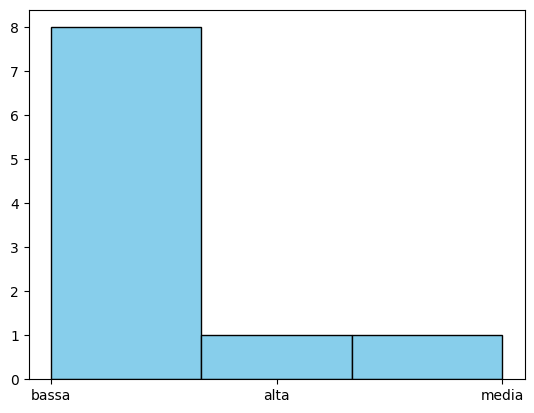

In [ ]:
plt.hist([d['urgenza'] for d in finale], bins=3, color='skyblue', edgecolor='black')
plt.show()

## NLTK Part-of-Speech Tagging POS Tagging

In [ ]:
# E' una tecnica di analisi linguistica che consiste nell'assegnare a ogni parola di un testo la sua parte del discorso (nome, verbo, aggettivo, ecc.).
# Alternativa più avanzata al tokenization, che divide il testo in parole e frasi
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Scarica il necessario (solo la prima volta)
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Esempio con una frase semplice
testo = "I would like to cancel my order"
# Dividiamo la frase in parole (tokenization)
tokens = word_tokenize(testo)
# Facciamo il POS tagging
tagged = pos_tag(tokens)

# Vediamo i risultati
for parola, tag in tagged:
    print(f"{parola}: {tag}")


I: PRP
would: MD
like: VB
to: TO
cancel: VB
my: PRP$
order: NN


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tag principali per POS (Part-of-Speech) Tagging

# Elenco completo dei POS (Part-of-Speech) tag per l'inglese utilizzati in NLTK

# --- SOSTANTIVI ---
# NN - Nome comune, singolare: book, dog, house
# NNS - Nome comune, plurale: books, dogs, houses
# NNP - Nome proprio, singolare: John, Rome, Google
# NNPS - Nome proprio, plurale: Americans, Romans, Christians

# --- PRONOMI ---
# PRP - Pronome personale: I, you, he, she, it, we, they
# PRP$ - Pronome possessivo: my, your, his, her, its, our, their
# WP - Pronome wh: who, which, what
# WP$ - Pronome possessivo wh: whose

# --- VERBI ---
# VB - Verbo, forma base: go, write, eat
# VBD - Verbo, passato: went, wrote, ate
# VBG - Verbo, gerundio/participio presente: going, writing, eating
# VBN - Verbo, participio passato: gone, written, eaten
# VBP - Verbo, presente non 3a persona singolare: go, write, eat
# VBZ - Verbo, presente 3a persona singolare: goes, writes, eats
# MD - Verbo modale: can, could, must, should

# --- AGGETTIVI ---
# JJ - Aggettivo: good, big, red
# JJR - Aggettivo comparativo: better, bigger
# JJS - Aggettivo superlativo: best, biggest

# --- AVVERBI ---
# RB - Avverbio: quickly, silently, well
# RBR - Avverbio comparativo: better, faster
# RBS - Avverbio superlativo: best, fastest
# WRB - Avverbio wh: where, when, why

# --- PUNTEGGIATURA ---
# . - Punto
# , - Virgola
# : - Due punti
# ( - Parentesi aperta
# ) - Parentesi chiusa
# " - Virgolette
# ' - Apostrofo